# Importing the dataset

In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Titanic/train titanic.csv')

In [ ]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Understand, Clean, Format data

In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_train=df_train.interpolate()

In [ ]:
df_train[df_train['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,44.5,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.5,1,2,W./C. 6607,23.4500,NaN,S


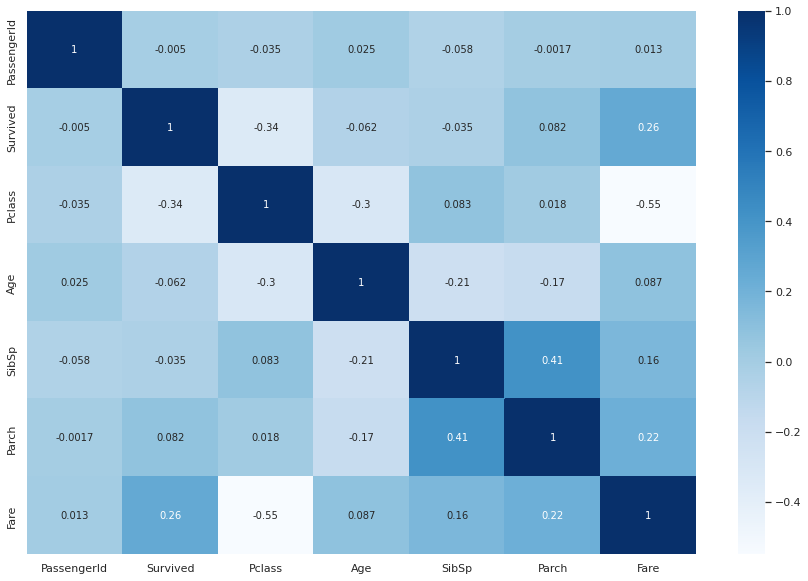

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set(color_codes = True)
%matplotlib inline
correlation = df_train.corr()
plt.figure(figsize=(15,10) )
sns.heatmap(correlation,annot = True,cmap = 'Blues')

In [ ]:
df_train = df_train.drop('Cabin', axis=1)

In [ ]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
df_train = df_train.dropna(axis=0, subset=['Embarked'])

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Titanic/test titanic.csv')

In [ ]:
df_test=df_test.interpolate()

In [ ]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Embarked'],axis='columns',inplace=True)

In [ ]:
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [ ]:
df_test.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [ ]:
df_train['Sex'] = pd.factorize(df_train.Sex)[0]

In [ ]:
df_test['Sex'] = pd.factorize(df_test.Sex)[0]

In [ ]:
inputs = df_train.drop('Survived',axis='columns')
target = df_train.Survived

# Applying Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3,random_state= 20)

In [ ]:
## checking length of x train y train
print(len(X_train),len(y_train),len(X_test),len(y_test))

622 622 267 267


In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
score = clf.score(X_test, y_test)

In [ ]:
print(score)

0.7565543071161048


In [ ]:
clf.fit(inputs,target)

LogisticRegression()

In [ ]:
pred=clf.predict(df_test)

In [ ]:
submission=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Titanic/gender_submission.csv')

In [ ]:
submission=pd.DataFrame({"PassengerId": submission["PassengerId"],"Survived":pred})

In [ ]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Titanic/submission.csv',index=False)